Обучение с учителем (есть данные и правильный ответ)

Обучение без учителем (есть данные, ответов нет)

Обучение с частичным привлечением учителя (не для всех есть ответы, либо ответов несколько)

Обучение с подкреплением (существую некая тенденция к движению (игра в шахматы), с обратной связью от нас)

Задачи:

Классификация (обучение с учителем)

Кластеризация (обучение без учителя)

Регрессия и прогнозирование (обычно обучение с учителем)

Понижение размерности данных и визуализация (обучение без учителя)

Обнаружение аномалий

Генеративные модели (создать картинку, текст)

Сегодня - Деревья решения

Начинаем с корня, далее ветвитмся (можно использовать для классификации, а также для непрерывных данных - регрессия)

Критерии:

1) Теоретико информационный - информационная энтропия (пытаемся снизить её как можно меньше) H=-сумма(Ni/N*log(Ni/N))

2) Статистический подход - предполагаем какое-то распределение

Gimi(Q) = 1 - сумма(p^2) (хотим 0 в идеале)



Вопрос когда остановиться:

переобучились - если ну очень много штук

Решения:

Ранняя остановка- алгоритм стопиться после достижения условия(точности)

Ограничение глубины дерева

Задание минимального числа допустимых числа примеров в узле (чтобы не было там по 1 например)

+хорошо и быстро интерпритируются

+могут делать правила в сложной области

+быстро обучаются и прогнозируются

+мало гиперпараметров модели

-чувствительны к шумам во входных данных (могут быть глобальные изменения)

-разделительная граница имеет ограничения и где-то может не подходить

-легкое переобучение

-сложно найти оптимальное

-делает прогноз только для своих данных

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df["color"] = 0
for i in range(len(df)):
  if df.iloc[i,0] == "red" : df.iloc[i,-1] = 1
df[df.type=="red"].head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df.drop("quality", axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)
df.to_csv('winequality_clear.csv', index=False)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],shuffle=True, random_state=1240, train_size=0.8) 
#делим матрицу на x и y, перемешивание, сид перемешки, выранивание по колонке, размер тренировочной матрицы (доля)
print(x_train.shape,
x_test.shape, y_train.shape,y_test.shape)

(5170, 11) (1293, 11) (5170,) (1293,)


In [6]:
clf = tree.DecisionTreeClassifier(max_depth=5,random_state=1240) #сделали дерево
clf.fit(x_train, y_train) #тренируем

DecisionTreeClassifier(max_depth=5, random_state=1240)

In [7]:
y_pred = clf.predict(x_test)

In [8]:
metrics.accuracy_score(y_test,y_pred)

0.9860788863109049

In [9]:
f_names = df.iloc[:,:-1].columns
c_names = ['Белое', "Красное"]
print(f_names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


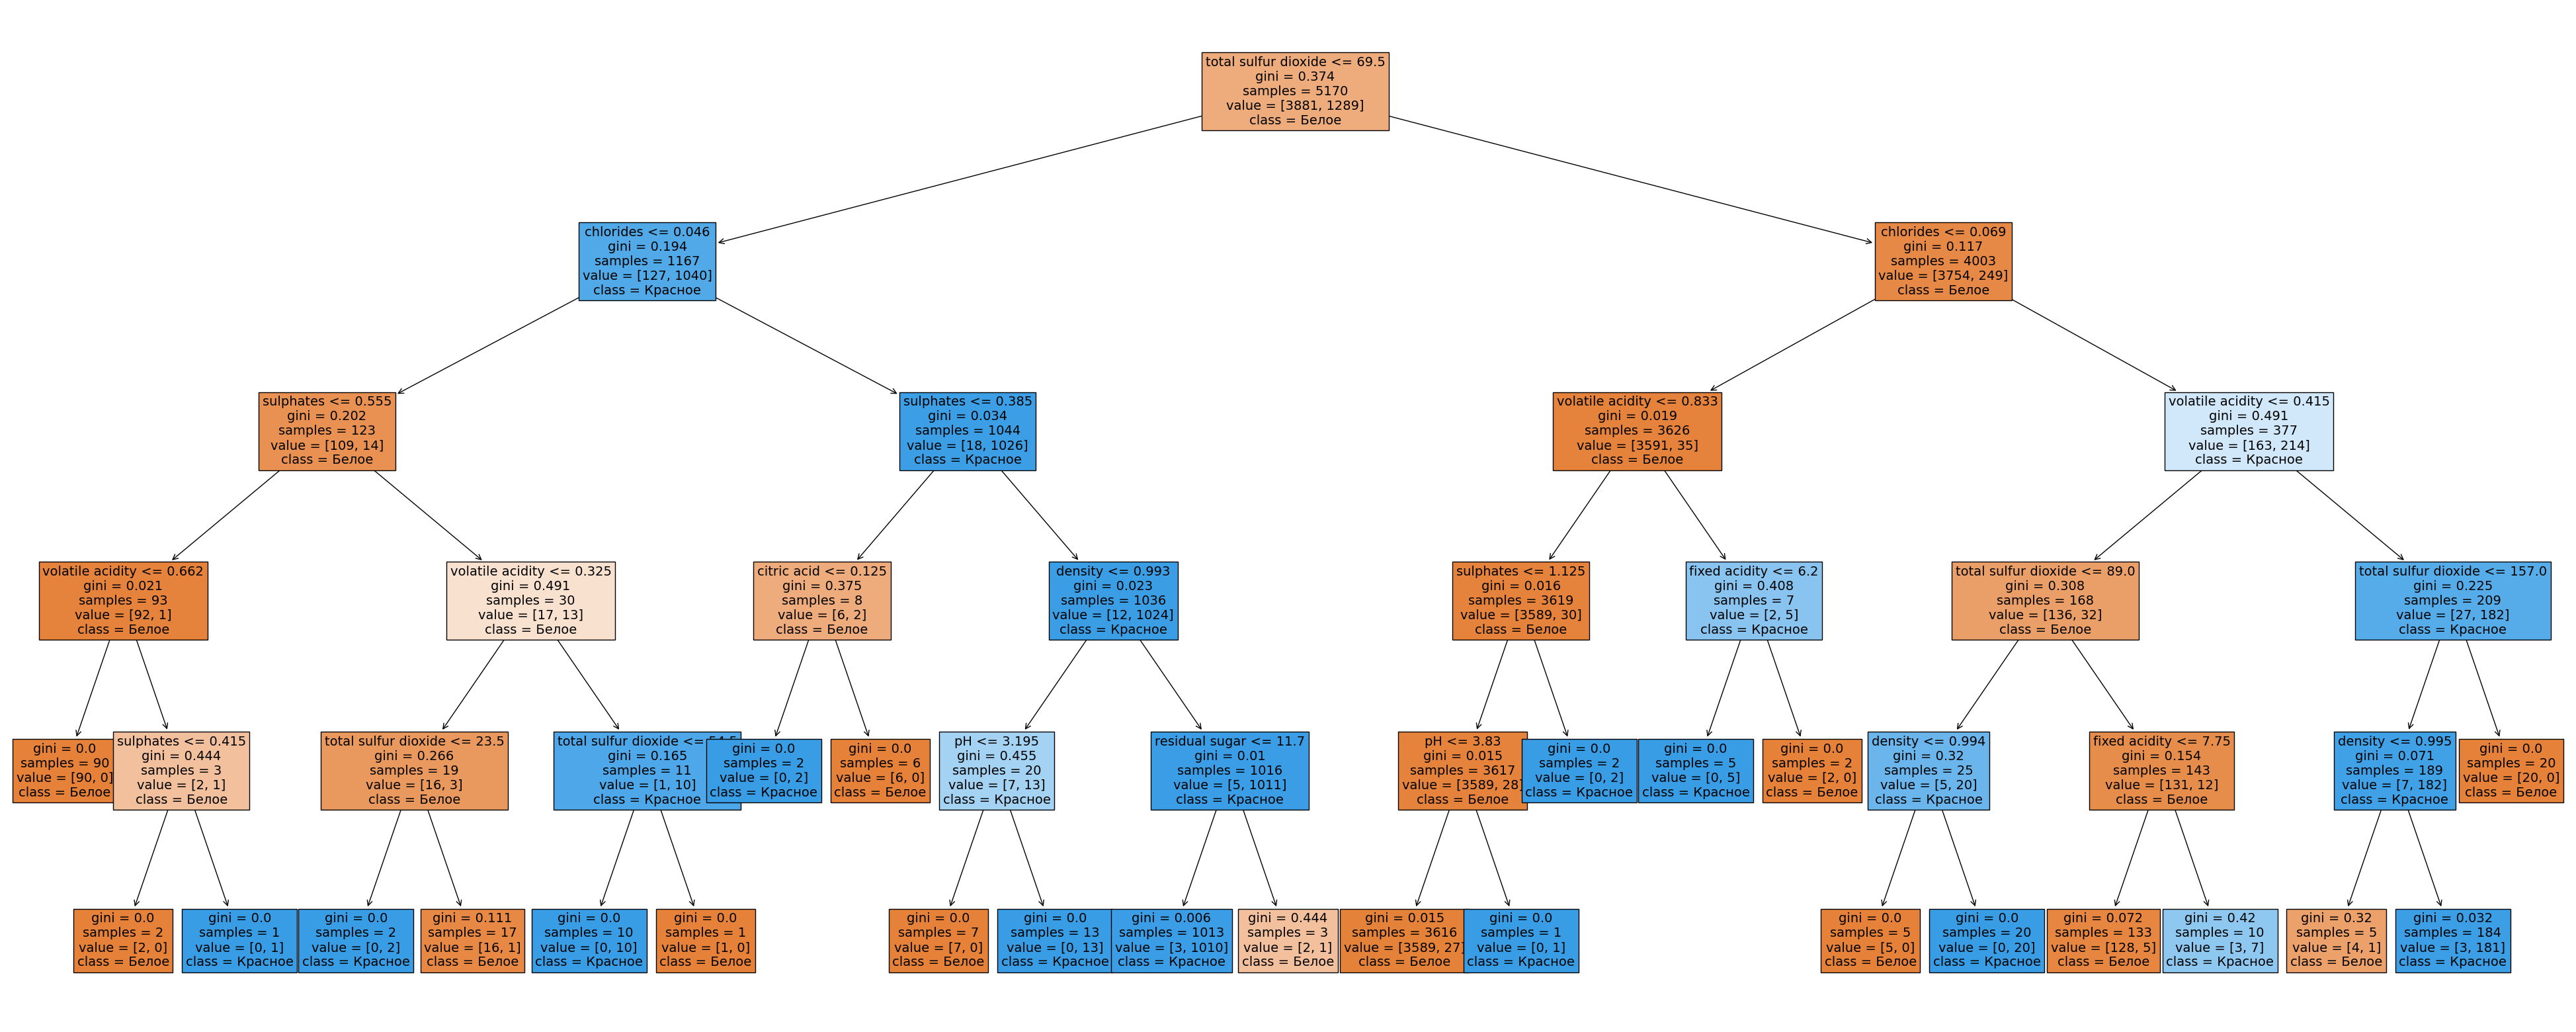

In [10]:
plt.figure(figsize=(50,20))

a = tree.plot_tree(clf, feature_names=f_names, class_names=c_names, fontsize=14, filled=True)

plt.show()

In [11]:
c_mat = metrics.confusion_matrix(y_test,y_pred)

In [12]:
import seaborn as sns

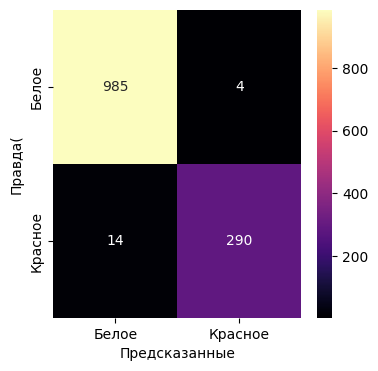

In [13]:
plt.figure(figsize= (4,4))

sns.heatmap(c_mat, annot=True, cmap='magma', fmt="d")
plt.xlabel("Предсказанные")
plt.xticks(ticks=[0.5,1.5], labels=c_names)
plt.yticks(ticks=[0.5,1.5], labels=c_names)
plt.ylabel("Правда(")
plt.show()
# 4 белых вина не угадали, 14 красных вина не угадали

In [14]:
tree_rules = tree.export_text(clf, feature_names=list(f_names))
print(tree_rules)

|--- total sulfur dioxide <= 69.50
|   |--- chlorides <= 0.05
|   |   |--- sulphates <= 0.56
|   |   |   |--- volatile acidity <= 0.66
|   |   |   |   |--- class: 0
|   |   |   |--- volatile acidity >  0.66
|   |   |   |   |--- sulphates <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sulphates >  0.42
|   |   |   |   |   |--- class: 1
|   |   |--- sulphates >  0.56
|   |   |   |--- volatile acidity <= 0.33
|   |   |   |   |--- total sulfur dioxide <= 23.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- total sulfur dioxide >  23.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- volatile acidity >  0.33
|   |   |   |   |--- total sulfur dioxide <= 54.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- total sulfur dioxide >  54.50
|   |   |   |   |   |--- class: 0
|   |--- chlorides >  0.05
|   |   |--- sulphates <= 0.38
|   |   |   |--- citric acid <= 0.12
|   |   |   |   |--- class: 1
|   |   |   |--- citric acid >  0.12
|   |   |   |   |--- class: 0


In [15]:
import pickle

pickle.dump(clf, open('decision_tree.pickle', 'wb')) #формат для сохранения в файл
clf_loaded = pickle.load(open('decision_tree.pickle', 'rb')) #формат для хранения
tree_rules = tree.export_text(clf_loaded, feature_names=list(f_names))
print(tree_rules)

|--- total sulfur dioxide <= 69.50
|   |--- chlorides <= 0.05
|   |   |--- sulphates <= 0.56
|   |   |   |--- volatile acidity <= 0.66
|   |   |   |   |--- class: 0
|   |   |   |--- volatile acidity >  0.66
|   |   |   |   |--- sulphates <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sulphates >  0.42
|   |   |   |   |   |--- class: 1
|   |   |--- sulphates >  0.56
|   |   |   |--- volatile acidity <= 0.33
|   |   |   |   |--- total sulfur dioxide <= 23.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- total sulfur dioxide >  23.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- volatile acidity >  0.33
|   |   |   |   |--- total sulfur dioxide <= 54.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- total sulfur dioxide >  54.50
|   |   |   |   |   |--- class: 0
|   |--- chlorides >  0.05
|   |   |--- sulphates <= 0.38
|   |   |   |--- citric acid <= 0.12
|   |   |   |   |--- class: 1
|   |   |   |--- citric acid >  0.12
|   |   |   |   |--- class: 0


Алгоритмы классификации:

Генеративные модели: изучают совместное распределение данных, вроде как элипсы [наивный байесовский классификатор, Байесовая сеть],
    может использоваться для прогназирования в целом


Дискриминационные модели: делят данные какими-то границами (правилами) [деревья решений, SVM, логистическая регрессия]




Случайный лес - совокупность деревьев решений = пример решения задачи ансамблем, получается такое групповое решение, при условии что все деревья разные, но так как деревья неустойчивые, то он сильно меняется.

Для всего этого дела будем использоваться bootstrap(берем данные для обучения с возвратом), результат получаем усреднением bagging.
В каждом узле будем использовать только корень из числа возможных параметров (кол-ва столбцов)


In [16]:
from sklearn.ensemble import RandomForestClassifier

n_estimators - кол-во деревьев (чем больше, тем лучше, пока ошибка не перестанет уменьшаться или не слишком долго становиться)
criterion - метод разбиения

In [17]:
clf2 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1240)
clf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1240)

In [18]:
y2_pred = clf2.predict(x_test)

In [19]:
print(f'просто дерево {metrics.accuracy_score(y_test,y_pred)}\nслучайный лес: {metrics.accuracy_score(y_test,y2_pred)}')

просто дерево 0.9860788863109049
случайный лес: 0.9945862335653519


Лес оказался гараздо сильнее, но его сложно интерпритировать и даже вывести нельзя

МЕТОД k-ближайших соседей
Алгоритм, который считает расстояние до всех ближайших k точек по n признакам, и считается что данные лежат компактно и группы живут рядом друг с другом.

Проблемы: 

1)нужно правильно масштабировать данные (считаем расстояние между ними "можно сделать свою функцию") >>> Можно данные нормировать

2)при большой размерности, расчитоваемое значение будет слишком велико и почти одинаково >>> уменьшаем размерность или чистим

Параметры:

n_neigbors: количество ближайших соседей

weights: веса

leaf_size: кол-во признаков (30 по дефолту)

metric: функция измеряющая расстояние (можно впихнуть функцию с двумя параметрами, которая будет это делать)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y3_pred = clf3.predict(x_test)
print(f'не нормированный k соседей: {metrics.accuracy_score(y_test,y3_pred)}')

не нормированный k соседей: 0.9404485692188709


НЕ нормировать плохо, после нормирования сделаем медиану ноль и отклоение от -1 до 1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) #делаем такую функцию для нормирования по x_train

StandardScaler()

In [23]:
x_train_S = scaler.transform(x_train)
clf4 = KNeighborsClassifier(n_neighbors=5)
clf4.fit(x_train_S, y_train)

KNeighborsClassifier()

In [24]:
x_test_S = scaler.transform(x_test)
y4_pred = clf4.predict(x_test_S)
print(f'не нормированный k соседей: {metrics.accuracy_score(y_test,y3_pred)}\nнормированный k соседей: {metrics.accuracy_score(y_test,y4_pred)}')

не нормированный k соседей: 0.9404485692188709
нормированный k соседей: 0.9930394431554525


Кривые обучения:



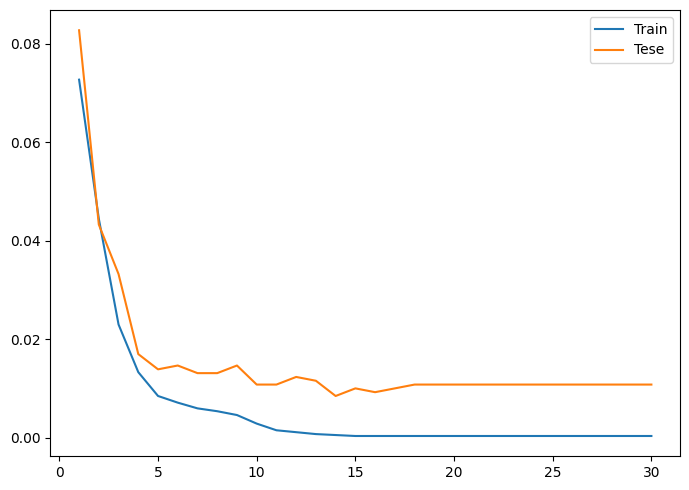

In [25]:
#На примере дереве решений, будем увеличивать глубину дерева
d = np.arange(30)
e1 = np.zeros_like(d, dtype=float)
e2 = np.zeros_like(d, dtype=float)

for i in d:
    t = tree.DecisionTreeClassifier(max_depth=i+1, random_state=1240)
    t.fit(x_train, y_train)
    y_pred = t.predict(x_train)
    e1[i] = 1-metrics.accuracy_score(y_train, y_pred)
    y_pred = t.predict(x_test)
    e2[i] = 1-metrics.accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,5))

ax1 = plt.plot(d+1, e1, label='Train')
ax2 = plt.plot(d+1, e2, label='Tesе')

plt.legend(handles=[ax1[0], ax2[0]])
plt.tight_layout()
plt.show()

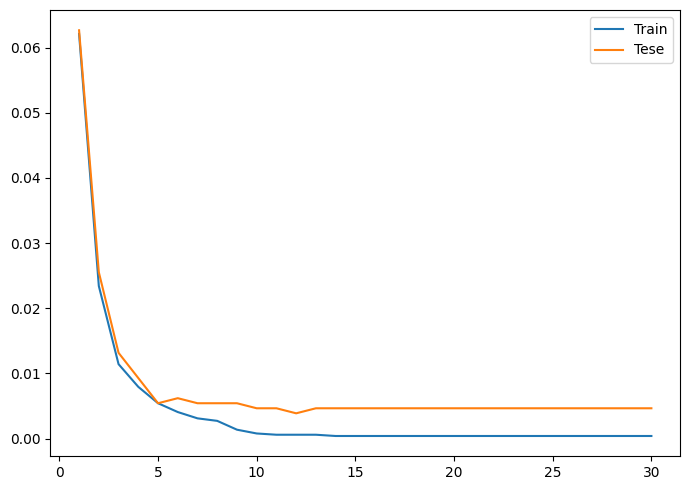

In [26]:
#На примере лес дереве решений, будем увеличивать глубину дерева
d = np.arange(30)
e1 = np.zeros_like(d, dtype=float)
e2 = np.zeros_like(d, dtype=float)

for i in d:
    t = RandomForestClassifier(n_estimators=50 ,max_depth=i+1, random_state=1240)
    t.fit(x_train, y_train)
    y_pred = t.predict(x_train)
    e1[i] = 1-metrics.accuracy_score(y_train, y_pred)
    y_pred = t.predict(x_test)
    e2[i] = 1-metrics.accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,5))

ax1 = plt.plot(d+1, e1, label='Train')
ax2 = plt.plot(d+1, e2, label='Tesе')

plt.legend(handles=[ax1[0], ax2[0]])
plt.tight_layout()
plt.show()

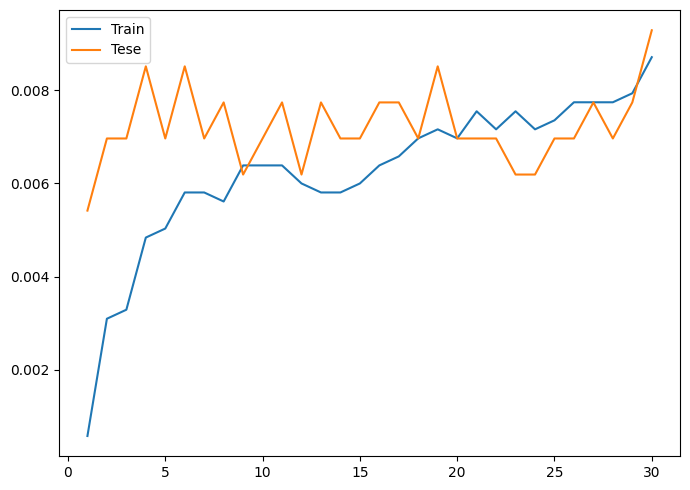

In [27]:
d = np.arange(30)
e1 = np.zeros_like(d, dtype=float)
e2 = np.zeros_like(d, dtype=float)

for i in d:
    t = KNeighborsClassifier(n_neighbors=i+1)
    t.fit(x_train_S, y_train)
    y_pred = t.predict(x_train_S)
    e1[i] = 1-metrics.accuracy_score(y_train, y_pred)
    y_pred = t.predict(x_test_S)
    e2[i] = 1-metrics.accuracy_score(y_test, y_pred)

plt.figure(figsize=(7,5))

ax1 = plt.plot(d+1, e1, label='Train')
ax2 = plt.plot(d+1, e2, label='Tesе')

plt.legend(handles=[ax1[0], ax2[0]])
plt.tight_layout()
plt.show()

Метод опорных векторов(SVM) - классификация

Проводим гиперплоскость, которая разделяет наши классы, так чтобы разница в расстоянии между ними была максимальна.

Чтобы функция была нелинейна есть ядерная функция(kernel function), через неё пропускаются данные и всё получается. (Гауссиан для окруженных данных)

Если данные плохо делятся >>> 1) Стараемся делать плоскость наиболее подходящую, даже если зазор меньше 2)Забиваем на выброс и лучше чтобы всё остальное хорошо было (параметр С-штраф, большие С разделяем как можно больше, С - выбросы игнорируем)

In [33]:
from sklearn.svm import SVC

clf4 = SVC()
clf4.fit(x_train_S, y_train)

SVC()

In [35]:
x_test_S = scaler.transform(x_test)
y4_pred = clf4.predict(x_test_S)
metrics.accuracy_score(y_test, y4_pred)

0.9969064191802011

Наивный Байес

Предсказывает вероятность того или иного результата

Каждая колонка должна быть назависимой и вносит одинаковый вклад, нужно представлять распределение данных

Нужно выбирать определенный классификатор, к примеру гаус


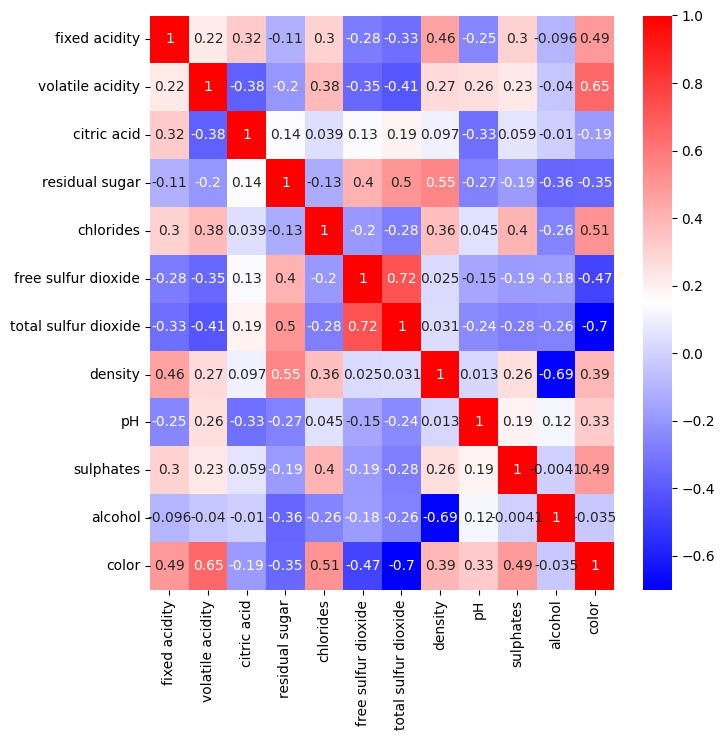

In [45]:
plt.figure(figsize= (7.5,7.5))
corr_matrix = df.corr()


ax = sns.heatmap(corr_matrix, annot=True, cmap='bwr')

plt.tight_layout()
plt.show()


In [50]:
from sklearn.naive_bayes import GaussianNB

clf5 = GaussianNB()
clf5.fit(x_train_S, y_train)
x_test_S = scaler.transform(x_test)
y5_pred = clf5.predict(x_test_S)
metrics.accuracy_score(y_test, y5_pred)

0.9814385150812065

Логическая регрессия

Делаем сигмоидную функцию (как кривая титрования), возращает вероятности метки (не разобрался)

Тут также есть параметр penalty - штраф за классификацию нерпавильную, max_iter - кол-во итераций 

In [58]:
from sklearn.linear_model import LogisticRegression

clf6 = LogisticRegression()
clf6.fit(x_train_S, y_train)
x_test_S = scaler.transform(x_test)
y6_pred = clf6.predict(x_test_S)
metrics.accuracy_score(y_test, y6_pred)

0.9953596287703016

In [59]:
!pip install rdkit-pypi

  Using cached rdkit_pypi-2022.9.5-cp311-cp311-win_amd64.whl (20.5 MB)


In [68]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole

In [64]:
df2 = pd.read_csv('chembl_drugs.txt.gz', sep='\t')

In [66]:
df2 = df2[df2["CANONICAL_SMILES"].notnull()]
df2 = df2[df2["USAN_STEM"].notnull()]
df2 = df2[df2["RULE_OF_FIVE"]== 'Y']
df2 = df2[df2["DEVELOPMENT_PHASE"] == 4]
len(df2)

700

In [69]:
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol='CANONICAL_SMILES')
df3 = df2.sample(200)
df3.head()

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES,ROMol
6249,52523,CHEMBL807,"Memantine (BAN, INN, MI); Memantine HCl (FDA, ...",4,NaN,Forest Laboratories Inc,-mantine,antivirals/antiparkinsonians (adamantane deriv...,-mantine,2003.0,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,CC12CC3CC(C)(C1)CC(N)(C3)C2,<rdkit.Chem.rdchem.Mol object at 0x000001AE74E...
2119,88797,CHEMBL941,"Imatinib (BAN, INN); Imatinib mesylate (FDA)",4,STI-571,Novartis Pharmaceuticals Corp,-tinib,tyrosine kinase inhibitors,-tinib,NaN,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c...,<rdkit.Chem.rdchem.Mol object at 0x000001AE74E...
322,297372,CHEMBL1349,"Valaciclovir (INN, BAN); Valacyclovir HCl (FDA...",4,256U87 HCl,GlaxoSmithKline,-vir,antivirals: antivirals (acyclovir type),-vir (-cyclovir),1993.0,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,CC(C)[C@H](N)C(=O)OCCOCn1cnc2C(=O)N=C(N)Nc12,<rdkit.Chem.rdchem.Mol object at 0x000001AE74E...
3720,33373,CHEMBL707,"Doxazosin (BAN, INN); Doxazosin Mesilate (JAN)...",4,UK-3327427; UK-33274-27,Pfizer Laboratories Div Pfizer Inc; Pfizer Inc.,-azosin,antihypertensives (prazosin type),-azosin,1981.0,...,Y,N,N,N,Prescription-only,NaN,NaN,NaN,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)C4COc5cc...,<rdkit.Chem.rdchem.Mol object at 0x000001AE74E...
1041,419622,CHEMBL1504,"Triamcinolone Acetonide (BAN, FDA, JAN, USP)",4,NaN,Apothecon Inc Div Bristol Myers Squibb; Allerg...,-olone,steroids (not prednisolone derivatives),-olone,NaN,...,N,Y,Y,Y,Over-The-Counter,NaN,NaN,NaN,CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)C=C[C@]...,<rdkit.Chem.rdchem.Mol object at 0x000001AE74E...


In [70]:
common_stems = df2.groupby('USAN_STEM').size().sort_values()[-10:]

In [71]:
common_stems

USAN_STEM
-tinib     12
-olone     12
-pin(e)    12
-ium       14
-vir       15
-caine     15
-oxacin    17
-cillin    17
-olol      18
sulfa-     18
dtype: int64

In [75]:
df_small = df2[df2['USAN_STEM'].isin(list(common_stems.index))].copy()
